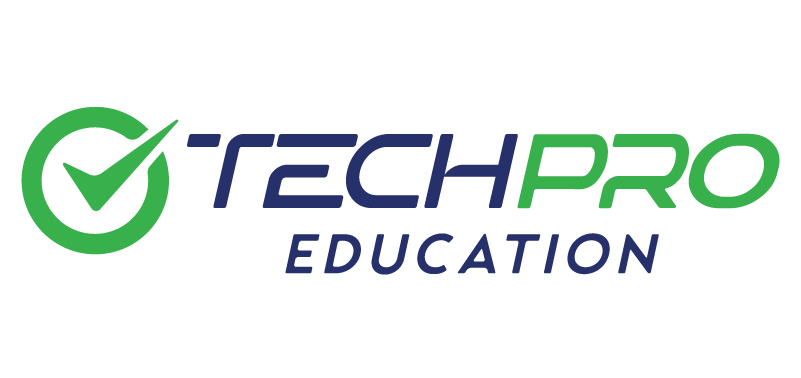

# WELCOME!

**Data reference link :**

https://journals.tubitak.gov.tr/cgi/viewcontent.cgi?article=3717&context=elektrik

https://archive.ics.uci.edu/dataset/81/pen+based+recognition+of+handwritten+digits

- El yazısı rakamlarını tanımak için kullanılan bir veri kümesidir. 

- Veri seti, el yazısı rakamlarının taranmış görüntülerini içerir

- Veri seti toplamda 10 sınıfa sahiptir ve her bir sınıf, 0 ile 9 arasındaki bir rakamı temsil eder. 

- 44 denekten 250şer veri alınmış. 

- Veri kümesi, görüntü verilerinin yanı sıra her bir görüntünün hangi rakamı temsil ettiği bilgisini de içerir.

- Bu veri kümesi, makine öğrenmesi algoritmalarının el yazısı tanıma konusundaki performanslarını değerlendirmek için sıkça kullanılır. 

- Ayrıca, derin öğrenme modellerinin eğitiminde kullanılan popüler bir veri kümesidir.

El Yazısı Rakamların Kalem Tabanlı Tanınması
Toplam 44 yazardan 250 örnek toplayarak bir rakam veritabanı oluşturuyoruz. Eğitim, çapraz doğrulama ve yazara bağlı test için 30 yazar tarafından yazılan örnekler, yazardan bağımsız test için ise diğer 14 yazar tarafından yazılan rakamlar kullanılmaktadır. Bu veri tabanı UNIPEN formatında da mevcuttur.

Entegre bir LCD ekrana ve kablosuz bir kaleme sahip WACOM PL-100V basınca duyarlı bir tablet kullanıyoruz. Giriş ve görüntüleme alanları aynı yerde bulunmaktadır. Intel 486 tabanlı bir bilgisayarın seri portuna bağlanan bu tablet, el yazısı örneklerini toplamamızı sağlıyor. Tablet, $x$ ve $y$ tablet koordinatlarını ve kalemin basınç seviyesi değerlerini 100 milisaniyelik sabit zaman aralıklarında (örnekleme hızı) gönderir.

Bu yazarlardan 500'e 500 tablet piksel çözünürlüğündeki kutulara rastgele sırayla 250 rakam yazmaları istenir. Denek sadece ilk giriş ekranları sırasında izlenir. Her ekranda, yazılacak rakamların üzerinde gösterildiği beş kutu bulunmaktadır. Deneklere sadece bu kutuların içine yazmaları söylenir. Eğer bir hata yaparlarsa ya da yazdıklarından memnun kalmazlarsa, ekrandaki bir düğmeyi kullanarak bir kutunun içeriğini temizlemeleri söylenir. Çoğu yazar bu tür giriş cihazlarına aşina olmadığı için ilk on rakam göz ardı edilir, ancak denekler bunun farkında değildir.

Çalışmamızda sadece ($x, y$) koordinat bilgilerini kullanıyoruz. Kalem basınç seviyesi değerleri göz ardı edilmektedir. İlk olarak, temsilimizi ötelemelere ve ölçek bozulmalarına karşı değişmez hale getirmek için normalleştirme uyguluyoruz. Tabletten aldığımız ham veriler 0 ile 500 (tablet giriş kutusu çözünürlüğü) arasındaki tamsayı değerlerinden oluşmaktadır. Yeni koordinatlar, maksimum aralığa sahip koordinat 0 ile 100 arasında değişecek şekildedir. Çoğu karakter genişliğinden daha uzun olduğu için genellikle $x$ bu aralıkta kalır.

Öznitelik bilgileri
Sınıflandırıcılarımızı eğitmek ve test etmek için, rakamları sabit uzunlukta özellik vektörleri olarak temsil etmemiz gerekir. İyi sonuçlara yol açan yaygın olarak kullanılan bir teknik ( x_t, y_t) noktalarının yeniden örneklenmesidir. Burada zamansal yeniden örnekleme (zaman içinde düzenli aralıklarla yerleştirilmiş noktalar) veya uzamsal yeniden örnekleme (yay uzunluğu içinde düzenli aralıklarla yerleştirilmiş noktalar) kullanılabilir. Ham nokta verileri zaten zaman içinde düzenli aralıklarla yerleştirilmiştir ancak aralarındaki mesafe değişkendir. Önceki araştırmalar, yörünge üzerinde sabit sayıda düzenli aralıklı nokta elde etmek için uzamsal yeniden örneklemenin çok daha iyi performans verdiğini göstermiştir, çünkü noktalar arasında daha iyi bir hizalama sağlar. Yeniden örnekleme algoritmamız, nokta çiftleri arasında basit doğrusal enterpolasyon kullanır. Yeniden örneklenen rakamlar, zaman içinde düzenli aralıklarla yerleştirilmiş giriş dizisinin aksine, yay uzunluğunda düzenli aralıklarla yerleştirilmiş T noktalarından ( x_t, y_t )_{t=1}^T oluşan bir dizi olarak temsil edilir.

Dolayısıyla, giriş vektörü boyutu 2*T, yani yeniden örneklenen nokta sayısının iki katıdır. Deneylerimizde T=8,12,16 noktalarına uzamsal yeniden örnekleme yapmayı düşündük ve T=8'in doğruluk ve karmaşıklık arasında en iyi dengeyi sağladığını gördük.

# Exploratory Data Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError, ROCAUC

import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

## Load Dataset

In [4]:
df = pd.read_csv("pendigits_txt.csv")
df.head()

# inputlar x-y kordinatları

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


## Explore Data

In [5]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(df)

Data shape: (10992, 17)
___________________________
Data Types:
int64    17
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
class,int64,10992,10,0,0,9
input1,int64,10992,101,0,0,100
input10,int64,10992,101,0,0,100
input11,int64,10992,101,0,0,100
input12,int64,10992,101,0,0,100
input13,int64,10992,101,0,0,100
input14,int64,10992,101,0,0,100
input15,int64,10992,101,0,0,100
input16,int64,10992,101,0,0,100
input2,int64,10992,96,0,0,100


In [6]:
df.describe().T

# 2. ve 4. featurelar min-25% arası farklara dikkat !!

,count,mean,std,min,25%,50%,75%,max
input1,10992.0,38.814320,34.257783,0.0,6.0,32.0,65.0,100.0
input2,10992.0,85.120269,16.218571,0.0,76.0,89.0,100.0,100.0
input3,10992.0,40.605622,26.342984,0.0,20.0,40.0,58.0,100.0
input4,10992.0,83.774199,19.163646,0.0,72.0,91.0,100.0,100.0
input5,10992.0,49.770378,34.100515,0.0,18.0,53.0,78.0,100.0
input6,10992.0,65.573144,26.996688,0.0,49.0,71.0,86.0,100.0
input7,10992.0,51.220251,30.576881,0.0,28.0,53.5,74.0,100.0
input8,10992.0,44.498999,29.906104,0.0,23.0,43.0,64.0,100.0
input9,10992.0,56.868541,34.135530,0.0,29.0,60.0,89.0,100.0
input10,10992.0,33.695961,27.251548,0.0,7.0,33.0,54.0,100.0


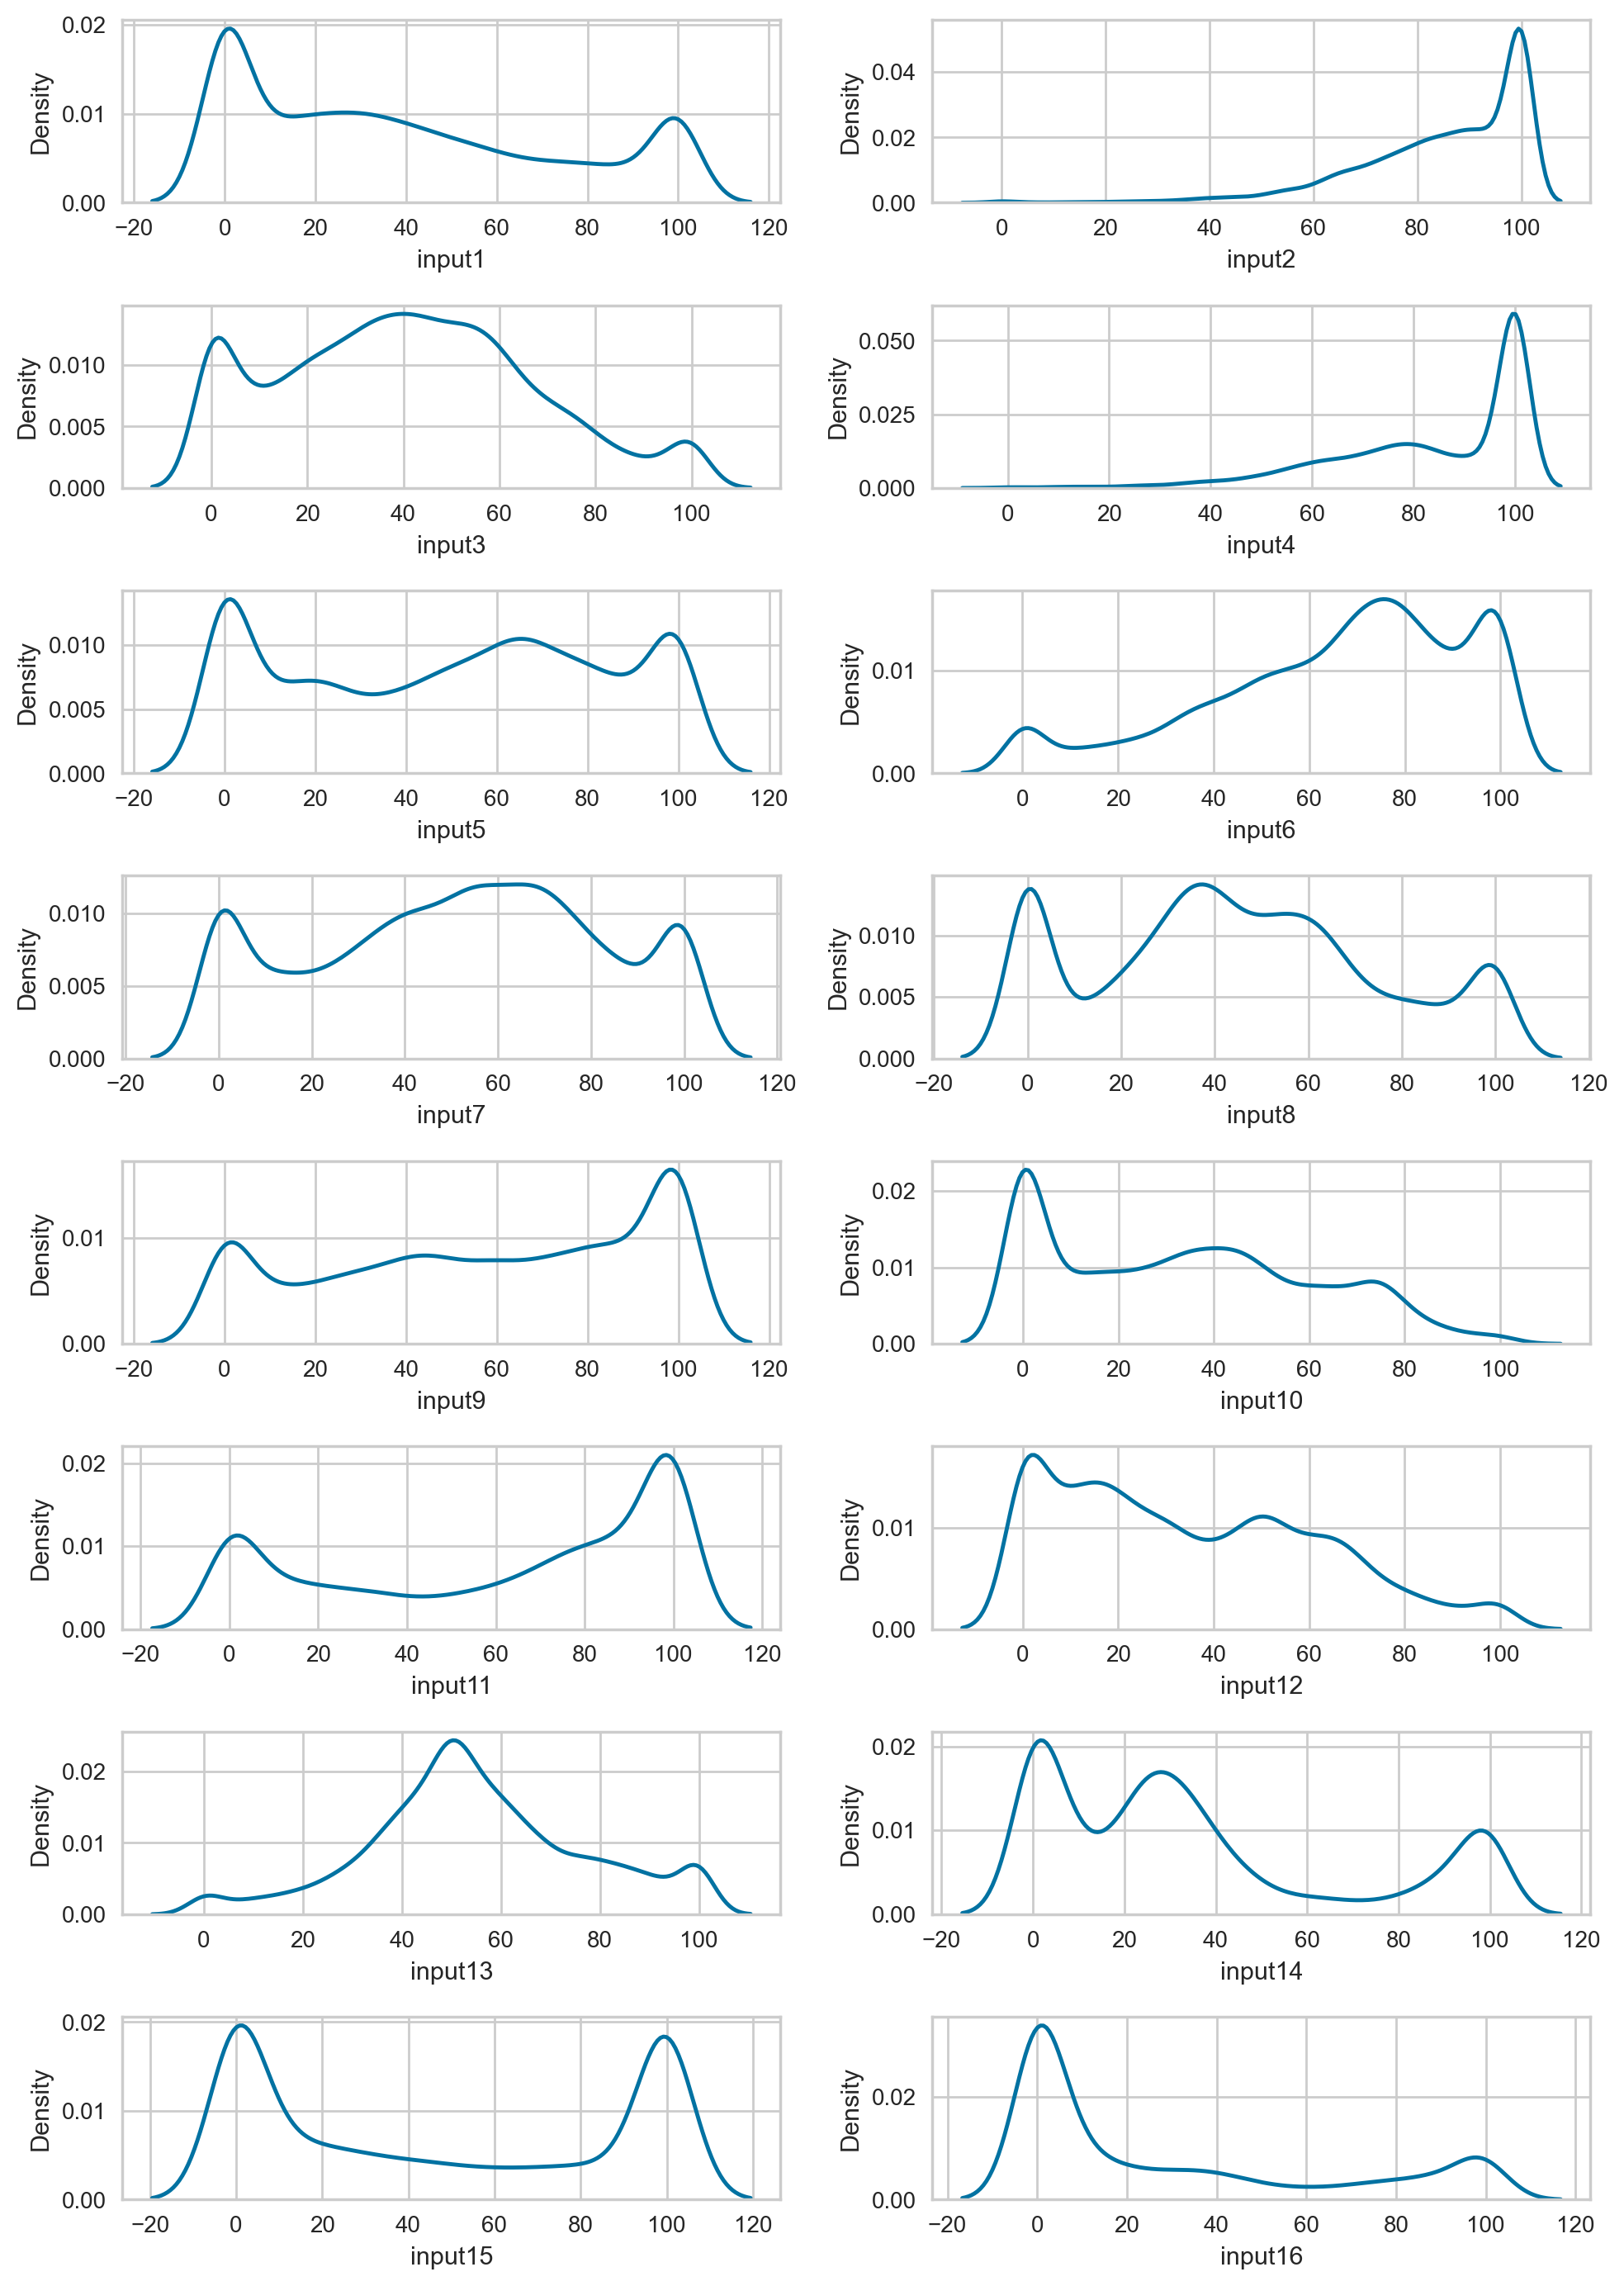

In [7]:
# Classlarımızı ayırmaya yarayacak bir insight ede edebilir miyiz ona bakıyoruz

fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.kdeplot(df[col])
plt.tight_layout();

- Bimodal normal distribution, normal bir dağılımın iki ayrı zirvesi olan bir dağılımdır. 

- Multimodal normal distribution, normal bir dağılımın üç veya daha fazla  zirvesi olan bir dağılımdır. 

- Bu tür bir dağılım, veri setinde iki farklı alt popülasyonun varlığını veya bir dış faktörün veri setindeki dağılımı etkilemiş olabileceğini gösterir.

- Bimodal-Multimodal normal distribution, birbirinden farklı alt popülasyonların ortalamaları ve standart sapmaları birbirinden önemli ölçüde farklı olduğunda ortaya çıkabilir.

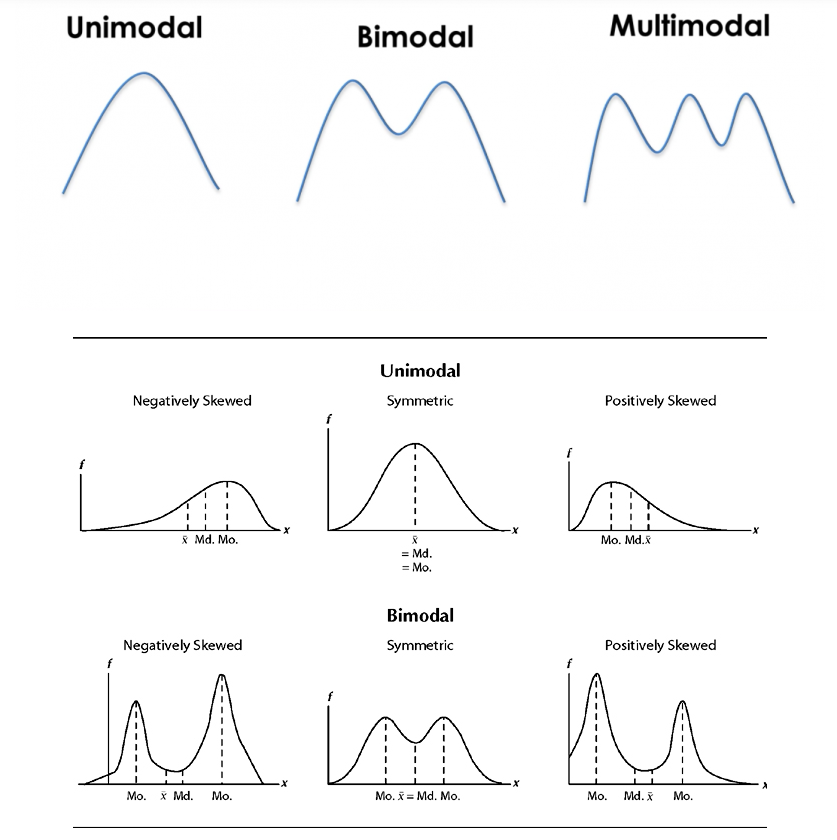

## 2.  Data Cleaning

### Detect Missing Values and Outliers

**Outlierlere duyarlı olmayan veya az duyarlı olan algoritmalar:**

- Destek Vektör Makineleri (SVM)
- Karar Ağaçları
- Rastgele Ormanlar
- Lineer Regresyon
- Yapay Sinir Ağları

**Outlierlere duyarlı olan algoritmalar:**

- K-Ortalama Kümeleme (K-Means)
- Hiyerarşik Kümeleme
- Lojistik Regresyon
- Ridge Regresyon
- Lasso Regresyon
- ElasticNet Regresyon

In [8]:
df.isnull().sum().any()  # missing value yok

False

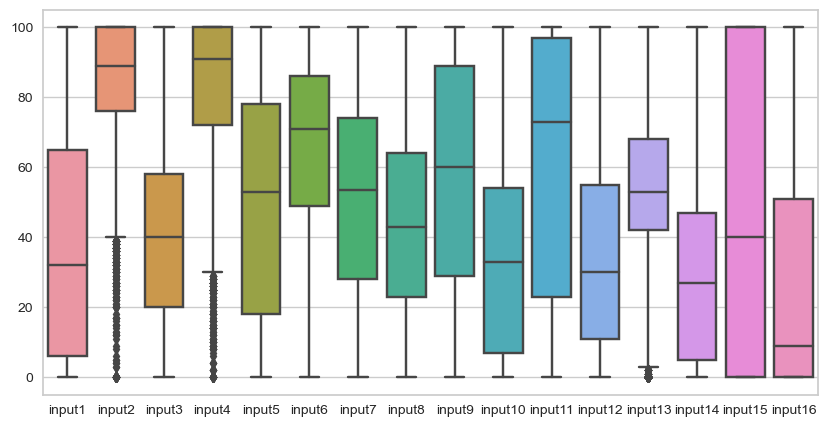

In [10]:
# outlier detection yapıyoruz, bütün featurelar için boxplotlarını çizdiriyoruz
# 2-4 ve 13. featurelar için outlier görülüyor 

plt.figure(figsize=(10,5))
sns.boxplot(data=df.drop("class", axis=1));

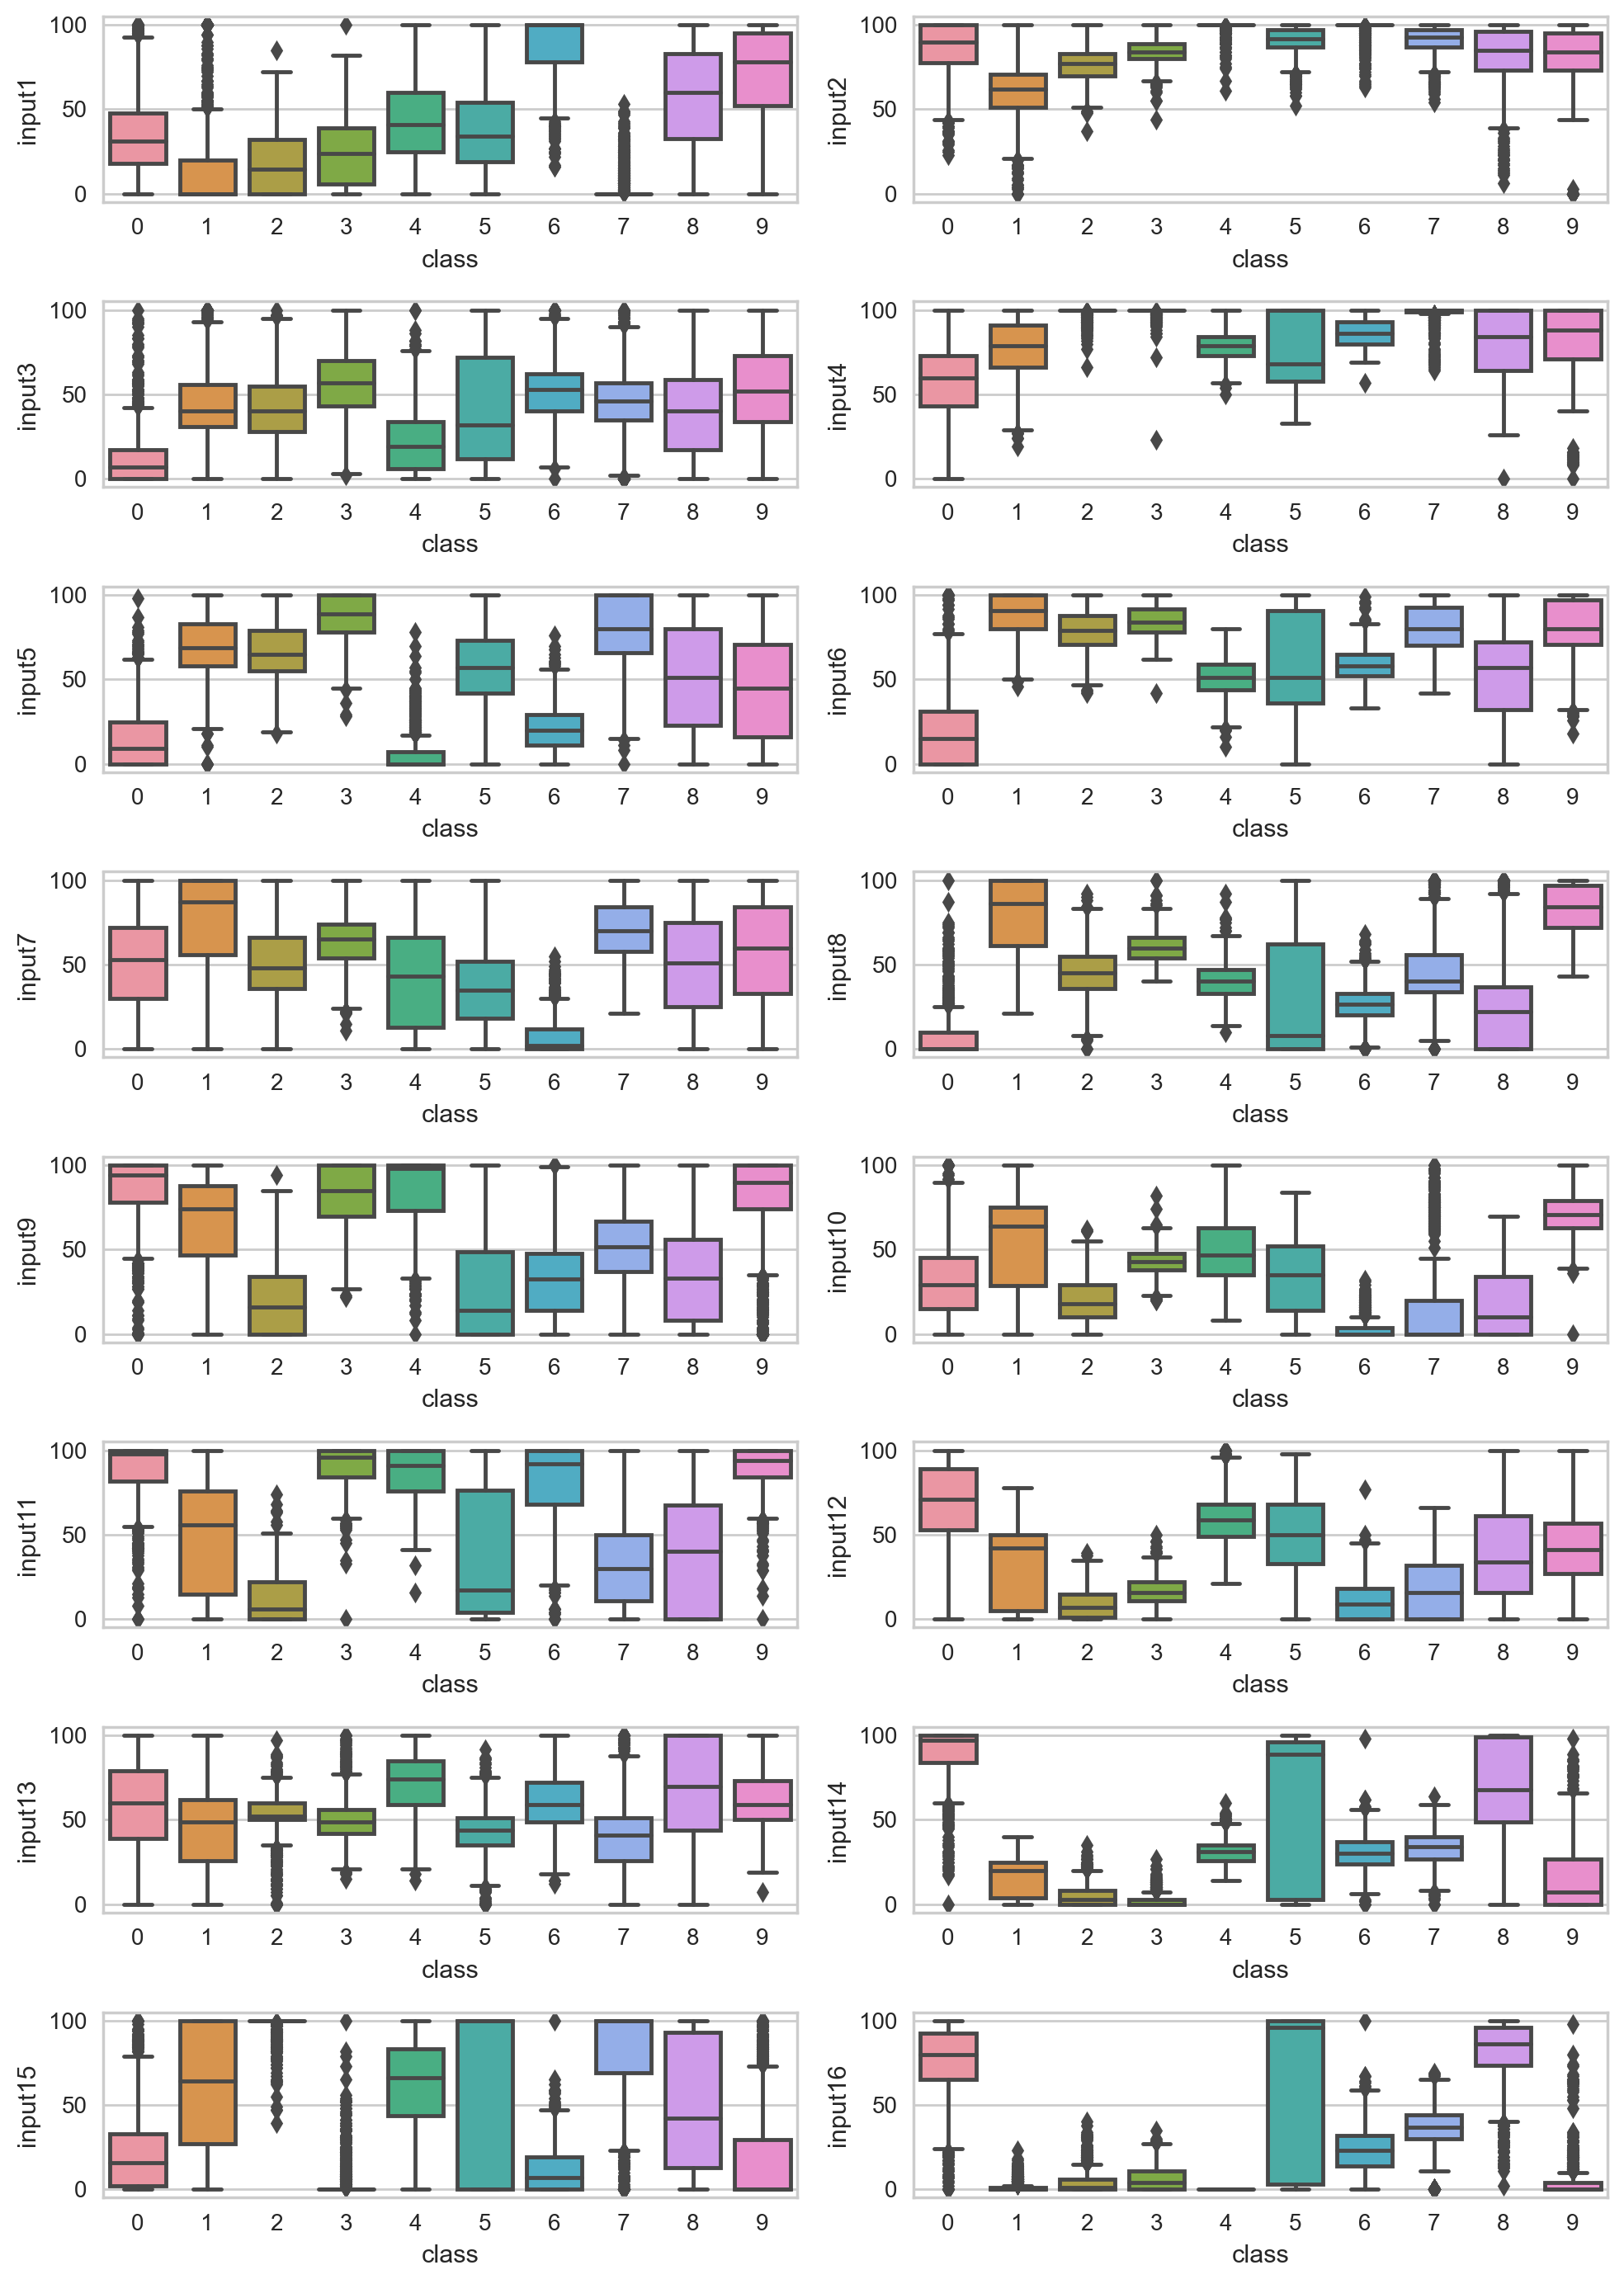

In [11]:
# yukardaki outlier değer içeren featurlardan emin olmak için classlar bazında her bir featurenın boxplotunu çiziyoruz
# kesin karar vermek için IQR değerlerine bakmak lazım 

fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.boxplot(y= df[col], x = df["class"], data=df)
plt.tight_layout();

**IQR hesaplamak için şu adımlar izlenir:**

- Veriler küçükten büyüğe sıralanır.
- Verilerin %25'ini ve %75'ini temsil eden ilk ve üçüncü çeyrekler hesaplanır.
- IQR, üçüncü çeyrekten ilk çeyrek çıkarılarak elde edilir.

Kod, öncelikle pandas DataFrame'inin belirli bir sütunundaki değerleri bir Numpy array'e dönüştürür (tolist() fonksiyonu ile)
daha sonra np.percentile() fonksiyonunu kullanarak bu array'deki belirtilen sütunun 25. persentil değerini hesaplar. 
Bu değer first_quartile değişkenine atanır.

**Tukey**, istatistiksel veri analizinde kullanılan bir kavramdır, aykırı değerleri tespit etmek için kullanılır.

IQR'nin kaç katı kadar uzaklıkta bir değerin aykırı kabul edileceğini belirleyen bir katsayı. Varsayılan değer 1.5'tir.

Bu, alt çeyrek ve üst çeyrek arasındaki mesafenin 1.5 katından daha uzakta olan verilerin aykırı değer olarak kabul edileceği anlamına gelir.

Fonksiyon, sütun verilerinin IQR'sini hesaplar, daha sonra belirtilen tukey katsayısıyla çarpılarak alt ve üst sınırları hesaplar. 

Daha sonra, verileri döngüde gezinerek her bir değerin alt ve üst sınırların dışında olup olmadığını kontrol eder ve bu değerleri bir sayaçla sayar.

In [12]:
# Sırasıyla her sınıf için aykırı değerlerin sayısını almak için bir fonksiyon üretebiliriz. 
# Pratiklik adına, sınıf ayrımını dikkate almadan özellikler için aykırı değerler buluyoruz.

def detect_outliers(df, col_name,tukey=1.5):
    ''' 
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(tukey*IQR)
    lower_limit = first_quartile-(tukey*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [13]:
# biz burda thresholdumuzu yani tukeyimizi 1.5 belirliyoruz

threshold = 1.5
out_cols = []
for col in df.columns:
    print(
        f"{col}\nlower:{detect_outliers(df, col,threshold)[0]} \nupper:{detect_outliers(df, col,threshold)[1]}\
        \noutlier:{detect_outliers(df, col,threshold)[2]}\n*-*-*-*-*-*-*"
    )
    if detect_outliers(df, col,threshold)[2] > 0 :
        out_cols.append(col)
print(out_cols)        

input1
lower:-82.5 
upper:153.5        
outlier:0
*-*-*-*-*-*-*
input2
lower:40.0 
upper:136.0        
outlier:196
*-*-*-*-*-*-*
input3
lower:-37.0 
upper:115.0        
outlier:0
*-*-*-*-*-*-*
input4
lower:30.0 
upper:142.0        
outlier:153
*-*-*-*-*-*-*
input5
lower:-72.0 
upper:168.0        
outlier:0
*-*-*-*-*-*-*
input6
lower:-6.5 
upper:141.5        
outlier:0
*-*-*-*-*-*-*
input7
lower:-41.0 
upper:143.0        
outlier:0
*-*-*-*-*-*-*
input8
lower:-38.5 
upper:125.5        
outlier:0
*-*-*-*-*-*-*
input9
lower:-61.0 
upper:179.0        
outlier:0
*-*-*-*-*-*-*
input10
lower:-63.5 
upper:124.5        
outlier:0
*-*-*-*-*-*-*
input11
lower:-88.0 
upper:208.0        
outlier:0
*-*-*-*-*-*-*
input12
lower:-55.0 
upper:121.0        
outlier:0
*-*-*-*-*-*-*
input13
lower:3.0 
upper:107.0        
outlier:208
*-*-*-*-*-*-*
input14
lower:-58.0 
upper:110.0        
outlier:0
*-*-*-*-*-*-*
input15
lower:-150.0 
upper:250.0        
outlier:0
*-*-*-*-*-*-*
input16
lower:-76.5 
upper:127.5

In [14]:
out_cols

['input2', 'input4', 'input13']

In [15]:
df1 = df.copy()       # outlier ları düşersek ne olur

In [16]:
# 1,5 iqr üzerindeki aykırı değerleri düşürmek için

for col in out_cols:
    df1 = df1[(df1[col] > detect_outliers(df1, col)[0])
             & (df1[col] < detect_outliers(df1, col)[1])]

In [17]:
df1.shape

(10450, 17)

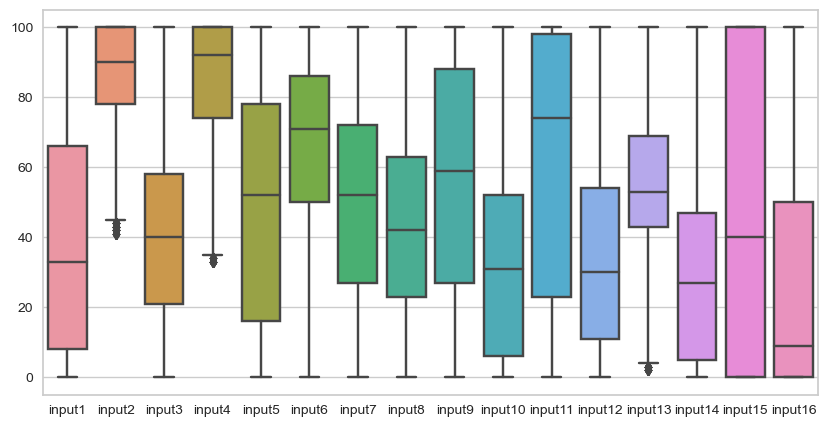

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df1.drop("class", axis=1));

In [19]:
len(df) - len(df1)

542

### My target column is `class`. So let's take a close look at this column.

In [20]:
# class sütununda 0'dan 9'a kadar olan değerlerin kaçar kez tekrar ettiğini yazdırır.

for i in range(0,10) :
    print(f"the number of {i}--->{df[df['class'] == i].shape[0]}")

the number of 0--->1143
the number of 1--->1143
the number of 2--->1144
the number of 3--->1055
the number of 4--->1144
the number of 5--->1055
the number of 6--->1056
the number of 7--->1142
the number of 8--->1055
the number of 9--->1055


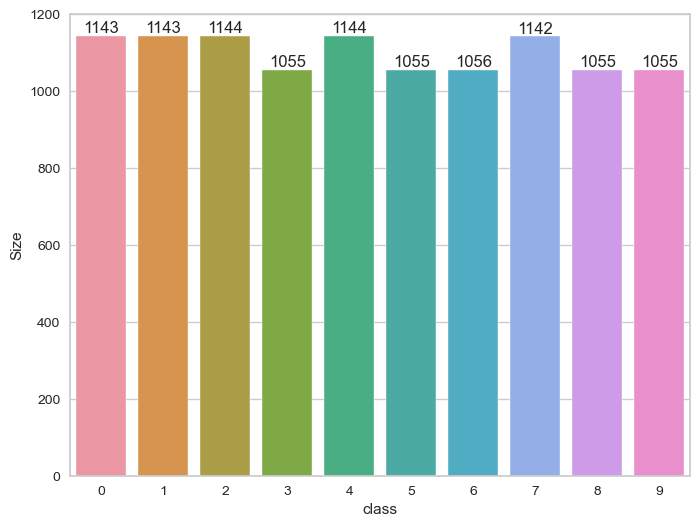

In [21]:
# Dengeli verilere (sınıf) sahip olduğumuzu görebiliriz. 
# Ancak, ek olarak, her sınıfın yüzdelik dağılımını kontrol etmek istiyorum.

class_digit = df.groupby('class').size()
class_label = pd.DataFrame(class_digit,columns = ['Size'])
plt.figure(figsize = (8,6))
ax= sns.barplot(x = class_label.index, y = 'Size', data = class_label)
plt.bar_label(ax.containers[0]);

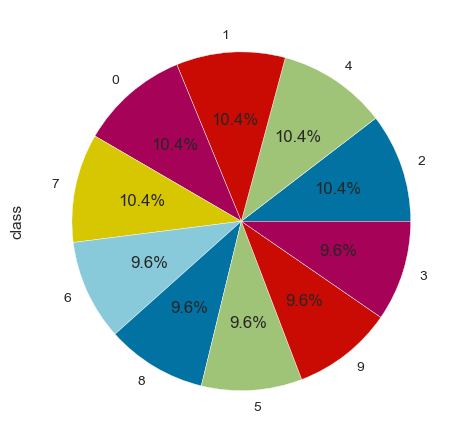

In [22]:
df["class"].value_counts().plot.pie(autopct='%1.1f%%');

### Now, let's take a closer look at correlation of continuous columns.

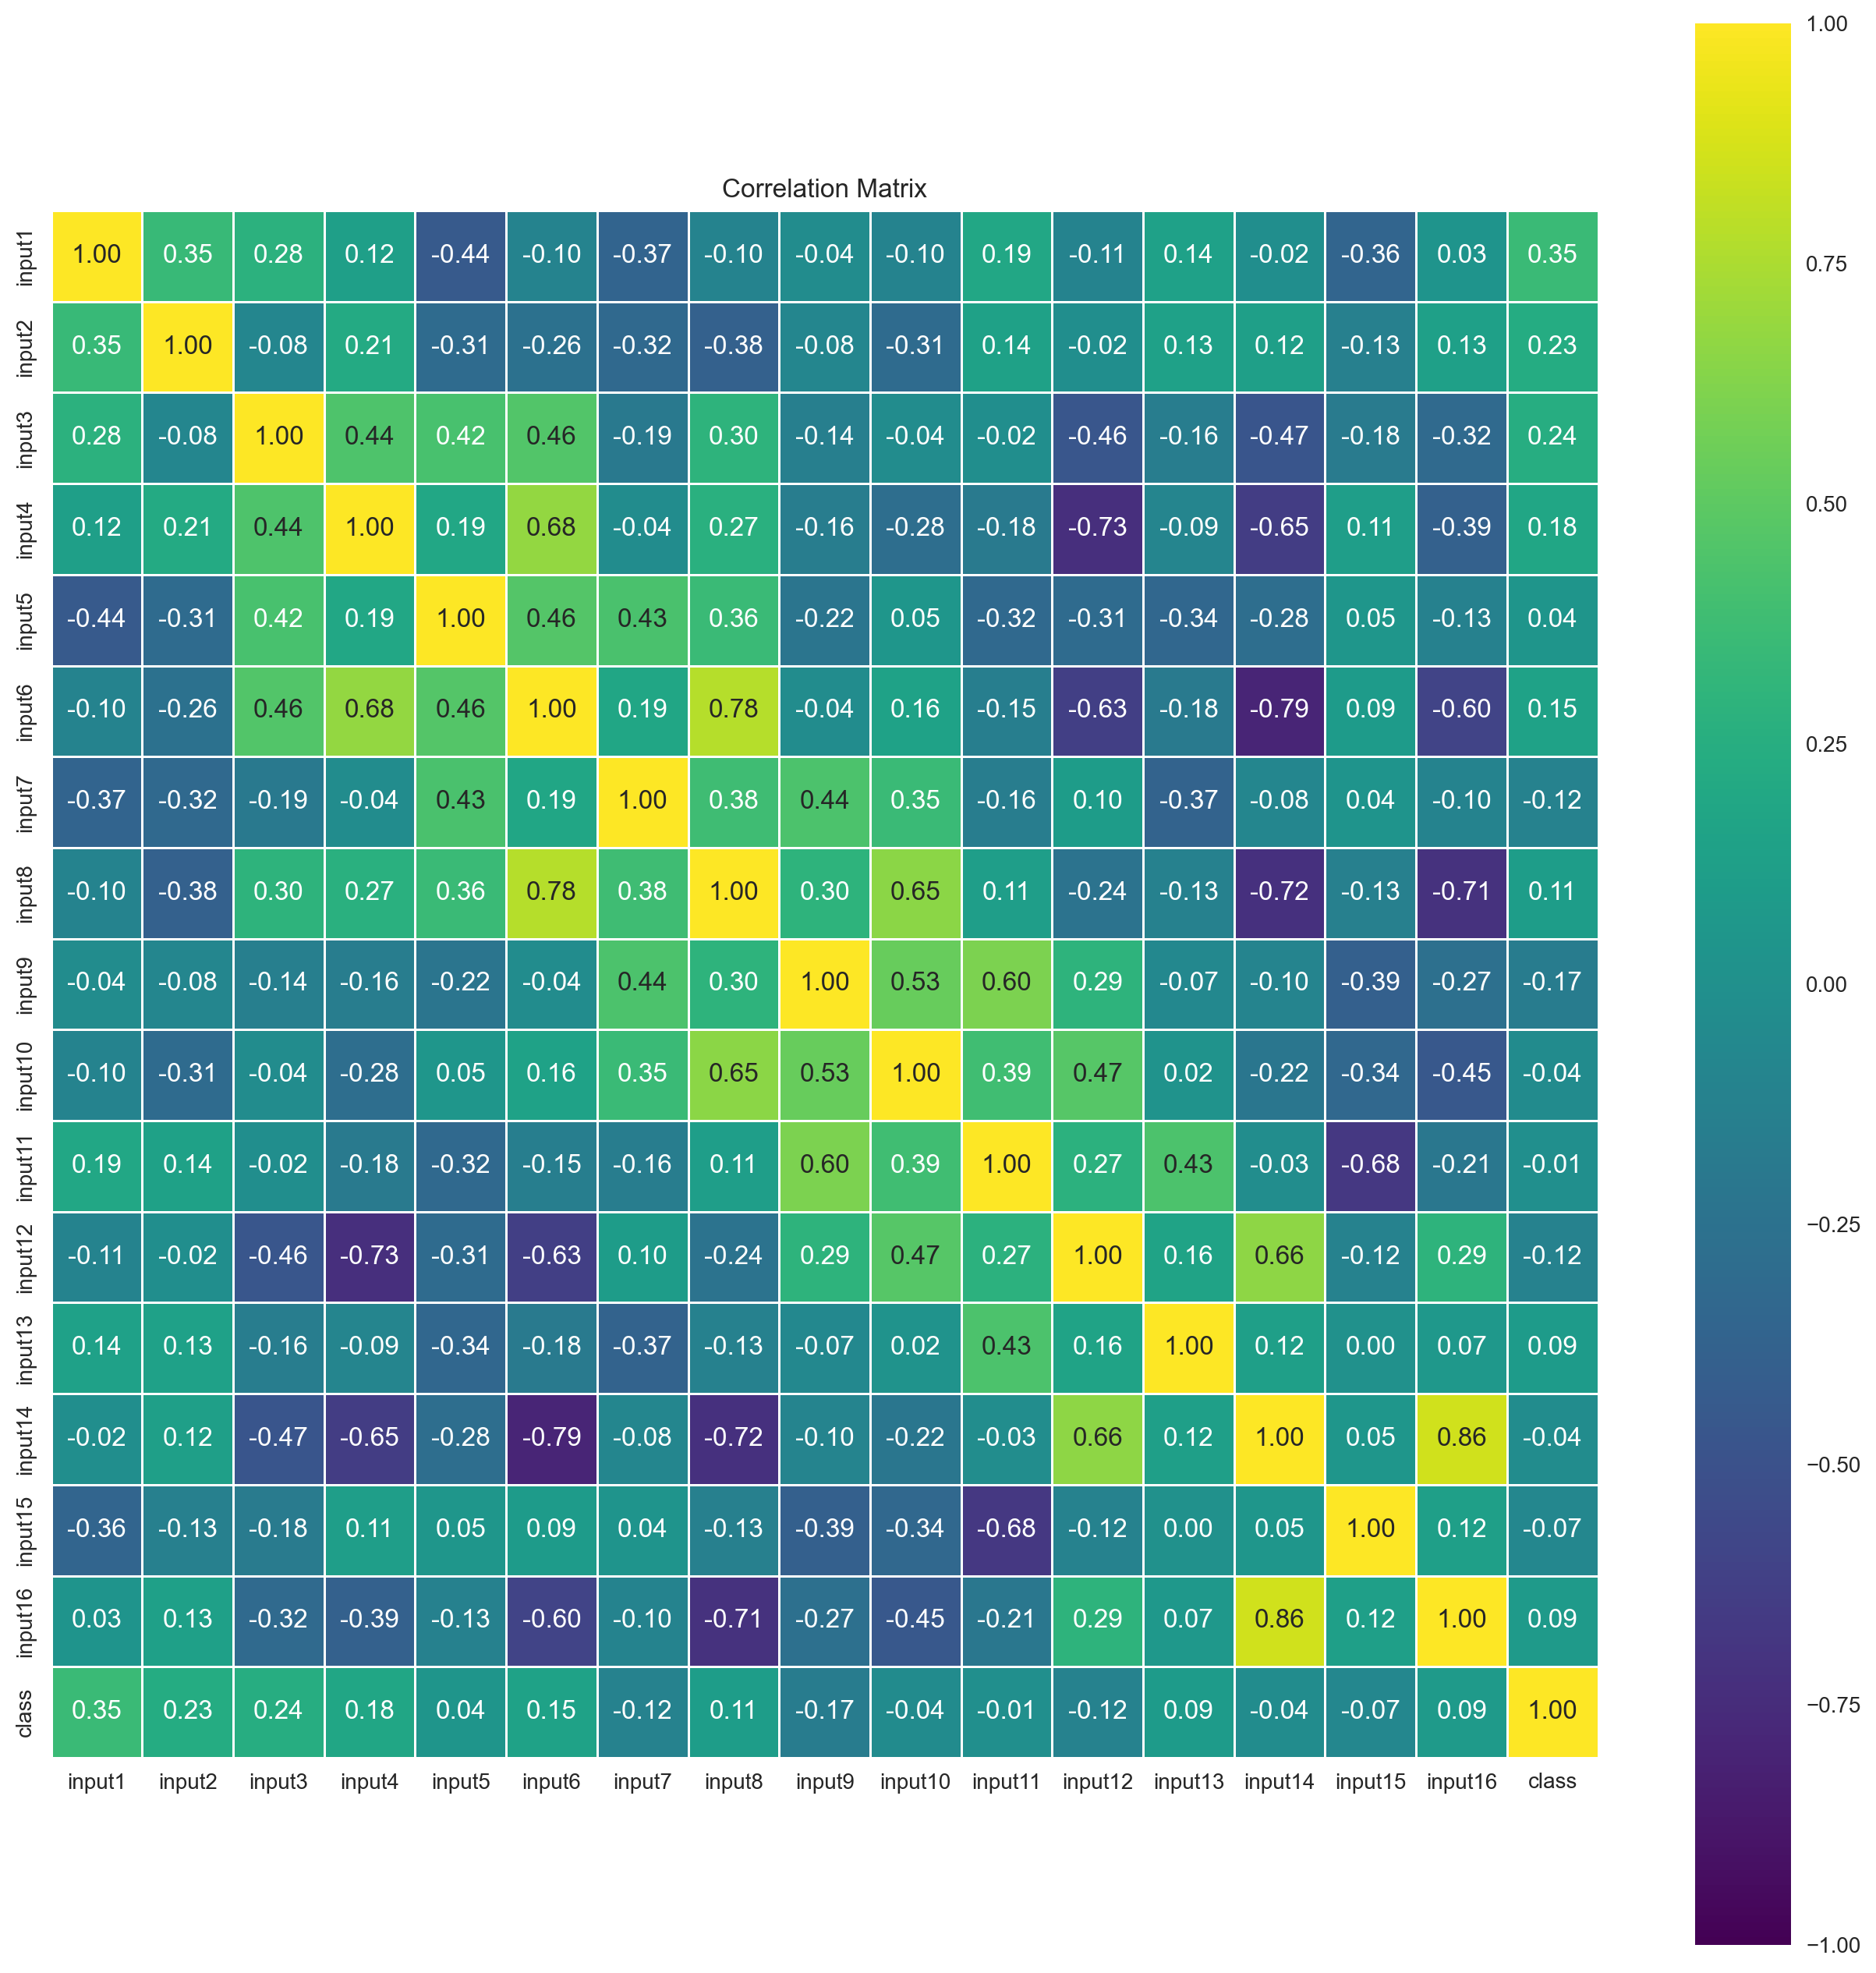

In [20]:
# 0.80 in altında üstünde bir korelasyon yok
# olsa da tree based modellerde multikolinarity sorun değil

corr_matrix = df.corr()

plt.figure(figsize=(16, 16), dpi=200)
sns.heatmap(corr_matrix,square=True, annot=True, fmt=".2f", annot_kws={"size": 12}, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix")

plt.show();

In [23]:
# kodumuzu ara ara csv dosyası olarak kaydetmek iyidir, özellikle EDA sonrası
# sıfırdan çalıştırmak zorunda kalmayız

df.to_csv("handdigit_EDA.csv", index = False)

# index=False parametresi, indeks sütununu dahil etmeden veri çerçevesinin diğer sütunlarını CSV dosyasına aktarır. 
# Bu parametre, dosyanın daha düzenli ve anlaşılır olmasını sağlar.

# Multi-class Classification

### Data Preprocessing

In [2]:
df = pd.read_csv("handdigit_EDA.csv")

In [4]:
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [3]:
X = df.drop("class", axis = 1)
y = df["class"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

# "shuffle=False" parametresi, verilerin rastgele karıştırılmadan doğrudan bölmeler oluşturmasını sağlar 
# shuffle default True, karıştırıp öyle train-test split yapar
# Sınıflar üzerinden data leakege i önlemek için shuffle yapmadan karıştırmadan ayırmamız gerekiyor
# Shuffle kullanırsak aynı kişiden aynı yazılı rakamlar her ikisinde de olabilir
# test ve tren tarafı ve setler arasında çakışma, leaky validation a sızdıran doğrulamaya neden olur
# Bu parametre, özellikle kronolojik sıraya sahip verilerle -finansal zaman serileri gibi-çalışırken kullanışlıdır

## Implement Support Vector Machine



**SVM (Destek Vektör Makinesi)**, bir sınıflandırma ve regresyon algoritmasıdır. 

- Küçük veya orta büyüklükteki veri setleri için uygundur. 

- Distance base bir model olduğundan Scale’e duyarlıdır. Scale edilmesi gerekir.

- SVM'nin temel mantığı, verileri sınıflandırmak için verileri en iyi şekilde ayrıştıran bir hyperplane (hiperdüzlem) bulmaktır. 

- SVM, verileri bir uzayda temsil eder ve bu uzayda bir veya daha fazla hyperplane ile sınırları belirler. Hyperplane, verileri iki sınıfa ayıran en iyi ayrım çizgisidir. Bu çizgi, sınıflar arasındaki en büyük mesafeyi (margin) sağlamalıdır. SVM, bu margin mesafesini en büyük yapmak için çalışır.

- SVM ayrıca, doğrusal olmayan verilerle çalışırken kernel fonksiyonları kullanır. Kernel fonksiyonları, verilerin yüksek boyutlu uzaylarda temsil edilmesine izin verir. SVM, bu şekilde, daha karmaşık ve doğrusal olmayan verileri sınıflandırmak için daha yüksek doğruluk sağlar.

https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167
https://medium.com/grabngoinfo/support-vector-machine-svm-hyperparameter-tuning-in-python-a65586289bcb

**Peki Multiclass Olursa Ne Olur??**
- SVM algoritması, iki sınıflı sınıflandırma için tasarlanmıştır. Ancak, çok sınıflı sınıflandırma problemleri için de kullanılabilir. SVM, çok sınıflı sınıflandırma problemlerinde birden fazla iki sınıflı sınıflandırıcı kullanarak çalışır.

- Bu yaklaşım, "one-vs-all (rest)" (OvA) hepsine karşı bir veya "one-vs-one" (OvO) bire bir olarak bilinir. 

- OvA yaklaşımı, her sınıfın geri kalan tüm sınıflardan ayrı olarak ele alındığı ve sınıflandırıcının her sınıfı diğerlerinden ayırt etmeye çalıştığı bir yaklaşımdır. OvO yaklaşımı, her iki sınıf arasında bir sınıflandırıcı oluşturulur ve tüm sınıflandırıcıların çıktıları bir araya getirilerek en sık tekrarlanan sınıf belirlenir.

- Örneğin, 3 sınıflı bir sınıflandırma problemi için OvA yaklaşımı, önce sınıf 1'i diğerlerinden ayırmaya çalışan bir sınıflandırıcı oluşturur, ardından sınıf 2'yi diğerlerinden ayırmaya çalışan bir sınıflandırıcı oluşturur ve son olarak sınıf 3'ü diğerlerinden ayırmaya çalışan bir sınıflandırıcı oluşturur. Her sınıf için oluşturulan sınıflandırıcının çıktıları, hangi sınıfa ait olduğunu belirlemek için birleştirilir.

- OvO yaklaşımı ise her iki sınıf arasında bir sınıflandırıcı oluşturarak çalışır. Örneğin, 3 sınıflı bir sınıflandırma problemi için, sınıf 1 ve sınıf 2 arasında bir sınıflandırıcı, sınıf 1 ve sınıf 3 arasında bir sınıflandırıcı ve sınıf 2 ve sınıf 3 arasında bir sınıflandırıcı oluşturulur. Sonuç olarak, her bir çift sınıf arasındaki sınıflandırıcının çıktıları birleştirilir ve en sık tekrarlanan sınıf belirlenir.

https://www.baeldung.com/cs/svm-multiclass-classification
https://www.analyticsvidhya.com/blog/2021/05/multiclass-classification-using-svm/
https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02   

### Vanilla SVC

In [5]:
scaler = MinMaxScaler()           # pipeline içerisinde kullanmak için tanımlıyoruz

In [6]:
modelSVM =  SVC(kernel="rbf")     # pipeline içerisinde kullanmak için tanımlıyoruz   # default=rbf

# RBF (Radial Basis Function); her bir noktanın belirli bir noktaya ne kadar benzediğini normal dağılım ile hesaplayan,
# ona göre sınıflandıran Kernel Trick metodu.
# iki örnek arasındaki benzerliği ölçmek için kullanılır. 
# Özellikle doğrusal olarak ayrılamayan veri setleri için oldukça kullanışlıdır.
# RBF çekirdeği, veriyi daha yüksek boyutlu bir uzaya dönüştürerek, bu yüksek boyutlu uzayda doğrusal bir sınıflandırma
# sınırı oluşturmaya yardımcı olur. 
# Bu, SVM'in doğrusal olarak ayrılamayan problemleri bile çözebilmesini sağlar.

In [7]:
from sklearn.pipeline  import Pipeline

modelSVM = Pipeline([("scaler",scaler),("SVM",modelSVM)])

# pipeline, modelin adımlarını birleştirmek için kullanılır.

In [8]:
modelSVM.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('SVM', SVC())])

In [9]:
# overitting kontrolü için hem train hem de test datasından predict alıyoruz

y_pred_test = modelSVM.predict(X_test)
y_pred_train = modelSVM.predict(X_train)

In [10]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

SVM_accuracy_test, SVM_accuracy_train, svm_f1_test, svm_f1_train

(0.990450204638472, 0.995678380529967, 0.9904537211561903, 0.9956930837146494)

**average parametresi**, çok sınıflı sınıflandırma problemlerinde bazı metriklerin (örneğin F1, precision, recall) nasıl hesaplanacağını belirtmek için kullanılır.

**average='macro':** Her sınıfın F1 puanlarının ağırlıklı olmayan ortalamasını döndürür. Bu yöntem, her sınıfın veri sayısının dengeli olması durumunda kullanılır.

**average='micro':** Tüm sınıfların yanıt sayılarının doğrudan toplanmasıyla, birleştirilmiş bir sınıf hesaplanır. Bu yöntem, tüm sınıfların veri sayısının dengesiz olduğu durumlarda kullanılır.

**average='weighted':** Her sınıfın F1 puanlarının, sınıfın örnek sayısıyla ağırlıklandırılmış ortalamasını döndürür. Yani her sınıfın ağırlığı, veri setindeki örnek sayısına göre belirlenir.

**average=None:** Her sınıf için bireysel skorları döndürür.

Özetle, macro yöntemi, her sınıfın performansını ayrı ayrı ölçer ve bu sınıfların performansını dengeli bir şekilde hesaplar. micro yöntemi ise, tüm sınıfların performansını birleştirir ve tüm sınıfların veri sayısının dengesiz olduğu durumlarda kullanılır.

accuracy_score fonksiyonunda average parametresi kullanılmaz çünkü doğruluk (accuracy) doğrudan tüm sınıflar üzerinden hesaplanır ve çok sınıflı sınıflandırmalarda sınıf dengesizliğine duyarlıdır.

In [11]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))

print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))


TEST CM
 [[219   0   0   0   0   0   0   0   2   0]
 [  0 224   4   0   0   0   0   1   0   0]
 [  0   1 224   0   0   0   0   0   0   0]
 [  0   0   0 218   0   0   0   0   0   1]
 [  0   0   0   0 240   2   0   0   0   0]
 [  0   0   0   3   0 205   0   0   0   2]
 [  0   0   0   0   0   0 210   0   0   0]
 [  0   1   0   0   0   0   0 221   0   0]
 [  0   0   0   0   0   0   0   0 199   0]
 [  0   0   0   0   0   0   0   3   1 218]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[920   1   0   0   0   0   1   0   0   0]
 [  0 901   6   5   1   0   0   1   0   0]
 [  0   3 915   0   0   0   0   1   0   0]
 [  0   1   2 830   0   1   0   1   0   1]
 [  0   0   0   0 899   2   0   1   0   0]
 [  0   0   0   2   0 840   0   0   1   2]
 [  0   0   0   0   0   1 845   0   0   0]
 [  0   1   0   0   0   0   0 919   0   0]
 [  0   0   0   0   0   1   0   1 854   0]
 [  0   0   0   0   0   0   0   1   0 832]]
TEST REPORT 
               precision    recall  f1-score

#### SVC GridsearchCV

**C:** Regülarizasyon parametresidir. Bu parametre ne kadar büyükse, sınıflandırma hatası o kadar düşük olur, ancak aynı zamanda overfitting riski de o kadar artar. Bu parametrenin küçük seçilmesi, daha iyi bir genelleştirme performansı sağlayabilir. C yi hard margin-soft margin belirlemek için kullanıyorduk. Model overfit olursa C’nin azaltılması gerekir.

**gamma** Kernel parametresiydi. RBF, polinom ve sigmoid kernellarında kullanılan kernel genişliğini kontrol eder. Data lineer değil de nonlineer ise datayı ayırmak içim kernel ekliyorduk. Düşük gamma değerleri daha geniş bir etki alanı tanımlar, bu nedenle karar sınırı daha düzgün olacaktır. Yüksek gamma değerleri daha kısıtlı bir etki alanı tanımlar, bu nedenle karar sınırı veriye daha yakın olabilir, ancak overfitting riski de artar.

Düşük bir gamma değeri, iki noktanın birbirine yakın olmasını tanımlar ve daha düzgün bir karar sınırı çizer. Yüksek bir gamma değeri ise, sadece çok yakın noktaların birbirine etkisi altında kalır ve daha dairesel bir karar sınırı çizer. gamma='scale' ile, veriler ölçeklendirilerek, farklı bir ölçekte olsalar bile, her bir özelliğin gamma için aynı ağırlığa sahip olması sağlanır

Model overfit olmuşsa gamma değerini düşürmemiz, model underfit olmuşsa gamma değerini yükseltmemiz gerekir.

**kernel:** Veri setinin doğrusal olarak ayrılamadığı durumlarda, veriyi daha yüksek boyutlu bir uzaya dönüştürerek doğrusal olarak ayrılabilir hale getirmek için kullanılır. Lineer, polinom, RBF (Gaussian) ve sigmoid gibi kernellar kullanılabilir.

**degree:** Sadece 'poly' yani polinom kernelı için kullanılır. Bu, polinomun derecesini belirtir. Örneğin, `degree=2` bir ikinci dereceden polinomu temsil eder. Default değeri 3'tür.

In [12]:
#skorlar yakın olduğu için cv atladım, zaten gridsearchde cv de var

param_grid = {'SVM__C':np.linspace(1, 1.3, 10),
              'SVM__gamma':["scale", "auto"]
             }

In [13]:
model = Pipeline([("scaler",scaler),("SVM", SVC(kernel="rbf", probability=True))]) 

# gridsearch içine neden cv=5 yazmadık ??
svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=2,
                              scoring="accuracy",
                              n_jobs=-1)

svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVM', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'SVM__C': array([1.        , 1.03333333, 1.06666667, 1.1       , 1.13333333,
       1.16666667, 1.2       , 1.23333333, 1.26666667, 1.3       ]),
                         'SVM__gamma': ['scale', 'auto']},
             scoring='accuracy', verbose=2)

In [14]:
svm_model_grid.best_params_

{'SVM__C': 1.3, 'SVM__gamma': 'scale'}

In [15]:
svm_model_grid.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('SVM', SVC(C=1.3, probability=True))])

In [16]:
# grid model üzerinden predictionlarımızı alıyoruz
# burdaki değerlerle yukardaki değerler birbirine çok yakın, dolayısıyla SVM modelimiz çok iyi çalışıyor diyebiliriz

y_pred_test = svm_model_grid.predict(X_test)
y_pred_train = svm_model_grid.predict(X_train)

In [17]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

SVM_accuracy_test, SVM_accuracy_train, svm_f1_test, svm_f1_train

(0.992269213278763, 0.9963607414989196, 0.9922812920945271, 0.9963642363445118)

In [18]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))

print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[220   0   0   0   0   0   0   0   1   0]
 [  0 225   3   0   0   0   0   1   0   0]
 [  0   1 224   0   0   0   0   0   0   0]
 [  0   0   0 218   0   0   0   0   0   1]
 [  0   0   0   0 241   1   0   0   0   0]
 [  0   0   0   3   0 206   0   0   0   1]
 [  0   0   0   0   0   0 210   0   0   0]
 [  0   1   0   0   0   0   0 221   0   0]
 [  0   0   0   0   0   0   0   0 199   0]
 [  0   0   0   0   0   0   0   3   1 218]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[920   1   0   0   0   0   1   0   0   0]
 [  0 902   6   4   1   0   0   1   0   0]
 [  0   1 917   0   0   0   0   1   0   0]
 [  0   1   2 830   0   1   0   1   0   1]
 [  0   0   0   0 902   0   0   0   0   0]
 [  0   0   0   2   0 840   0   0   1   2]
 [  0   0   0   0   0   1 845   0   0   0]
 [  0   1   0   0   0   0   0 919   0   0]
 [  0   0   0   0   0   1   0   1 854   0]
 [  0   0   0   0   0   0   0   1   0 832]]
TEST REPORT 
               precision    recall  f1-score

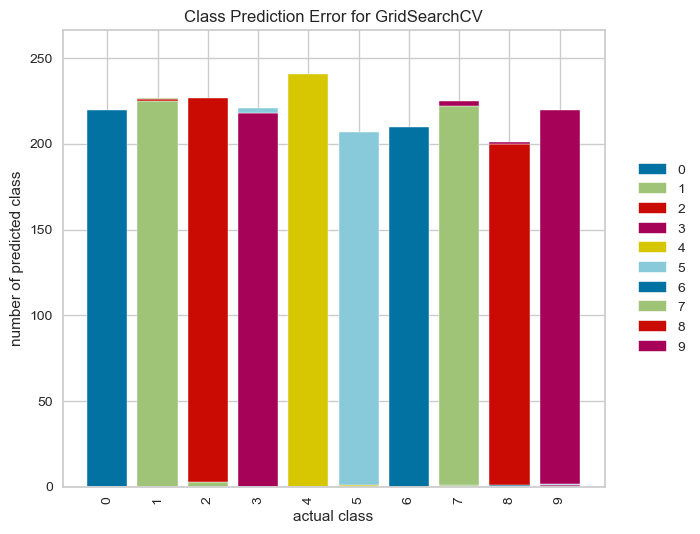

<Axes: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [19]:
# peki hangi classda ne kadar hata yapmış ??
# Grafiklerden çoğu sınıfın doğru tahmin edildiğini görebiliriz. 
# Ancak model, 2-3-7 sınıflarını diğerlerine göre daha kötü tahmin etti.

visualizer = ClassPredictionError(svm_model_grid)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

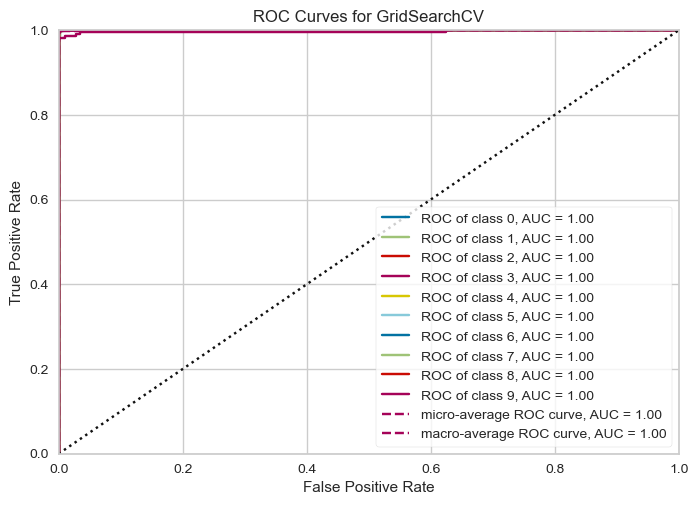

In [20]:
visualizer = ROCAUC(svm_model_grid, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                      # Finalize and render the figure

**classes=[str(i) for i in range(10);**
Bir sınıflandırma problemi için sınıf etiketlerini belirtmek için kullanılır. classes parametresi, sınıf etiketlerini temsil eden bir liste alır. Burada range(10) 0'dan 9'a kadar olan sayıları içeren bir dizi oluşturur. str(i) ifadesi her sayıyı string olarak dönüştürür ve oluşan listeye ekler. Bu şekilde sınıf etiketleri string olarak belirlenir ve görselleştirme için kullanılır.

In [21]:
# Bu kod, çok sınıflı log-loss (çok sınıflı cross-entropy) metriğini kullanarak, 
# svm_model_grid modelinin test seti tahminlerinin performansını değerlendirir.

from sklearn.metrics import log_loss

y_pred = svm_model_grid.predict_proba(X_test)
log_loss_score = log_loss(y_test, y_pred)
print("Log loss score: ", log_loss_score)

Log loss score:  0.03320425352356629


Precision-recall eğrileri, iki sınıflı (binary) sınıflandırma problemlerinde kullanılır.

Bu durumda, çok sınıflı sınıflandırma performansını değerlendirmek için, örneğin çok sınıflı log-loss gibi farklı bir metrik kullanabilirsiniz

**Log loss**, sınıflandırma modellerinin performansını değerlendirmek için kullanılan bir metriktir. 

Doğru olarak adlandırılan olasılık skorlarına dayanarak bir modelin ne kadar iyi performans gösterdiğini ölçer. 

Özellikle, gerçek etiketlere (sınıflara) göre tahmin edilen olasılıkların ne kadar doğru olduğunu ölçer.

predict_proba() yöntemi, çok sınıflı sınıflandırma modellerinde, her bir sınıf için ayrı ayrı olasılık tahminleri yapar. Bu nedenle, svm_model_grid modelinden elde edilen tahminler, predict_proba() yöntemi kullanılarak y_pred değişkenine atılır.

Sonrasında, gerçek hedef değerleri olan y_test ile, log_loss() fonksiyonu kullanılarak karşılaştırılır ve bir log-loss skoru elde edilir. Log-loss skoru, modelin gerçek değerleri ne kadar iyi tahmin ettiğini ölçer ve skor ne kadar düşük olursa, model o kadar iyi performans gösterir.

Log-loss skoru, modelin gerçek değerleri ne kadar iyi tahmin ettiğini ölçer ve skor ne kadar düşük olursa, model o kadar iyi performans gösterir.

İdeal skor 0'dır, bu da mükemmel bir sınıflandırma anlamına gelir. Yüksek bir log kaybı değeri, modelin tahminlerinin gerçek etiketlerden oldukça farklı olduğunu gösterir.

Log kaybı, modelin sadece doğru veya yanlış tahminlerini değil, aynı zamanda bu tahminlerin ne kadar emin olduğunu da dikkate alır. Bu nedenle, özellikle olasılık tahminleri almak istediğiniz durumlarda log kaybını kullanmak yararlıdır.

SVM, Logistic Regression, Decision Trees, Random Forest, GB, XGBoost, KNN gibi modellerle kullanılabilir.

## Implement Random Forest Classifier


Random Forest ile Decision Tree nin dezavantajları ortadan kaldırılır.

**Random Forest**; birden çok karar ağacı üzerinden her bir karar ağacını farklı bir gözlem örneği üzerinde eğiterek çeşitli modeller üretip, sınıflandırma oluşturmanızı sağlamaktadır.

DT de en güçlü feature kullanılarak tahminlerde bulunulur bu da varyans arttırımına yani overfittinge neden olur. Bu durumun önüne geçmek için geliştirilmiştir.

Kural tabanlı bir yaklaşım kullandığı için verilerin normalleştirilmesi gerekli değildir.

Yapısal olarak oluşturmuş olduğu fazlaca çözüm (Ağaç) sayısından dolayı biraz yavaş sonuç üretmektedir, (Eğitim hızlı, tahmin uzun)(Özellikle gerçek zamanlı tahminlemeler için)

Random Forest ta train setin belirli oranda random olarak alınan herbir alt kümesi için fetaures larıda random olarak alarak ayrı ayrı DT modelleri kurar. Yani her seferinde aynı güçlü fetaure kullanılmıyor ve her seferinde random olarak alınan fetaure lar kullanılıyor.

### Vanilla RF

In [23]:
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

In [25]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.9840836743974534, 1.0, 0.9841848215568971, 1.0)

In [26]:
print("TEST REPORT")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, digits = 3))


print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train, digits = 3))

TEST REPORT
[[217   0   0   0   0   0   0   0   4   0]
 [  0 216  12   0   0   0   0   1   0   0]
 [  0   3 222   0   0   0   0   0   0   0]
 [  0   0   0 218   0   0   0   0   0   1]
 [  0   0   0   0 242   0   0   0   0   0]
 [  0   0   0   3   0 205   0   0   0   2]
 [  0   0   0   0   0   0 210   0   0   0]
 [  0   2   1   0   0   0   0 218   1   0]
 [  0   0   0   0   0   0   0   0 199   0]
 [  0   1   0   0   0   0   0   3   1 217]]
              precision    recall  f1-score   support

           0      1.000     0.982     0.991       221
           1      0.973     0.943     0.958       229
           2      0.945     0.987     0.965       225
           3      0.986     0.995     0.991       219
           4      1.000     1.000     1.000       242
           5      1.000     0.976     0.988       210
           6      1.000     1.000     1.000       210
           7      0.982     0.982     0.982       222
           8      0.971     1.000     0.985       199
           9    

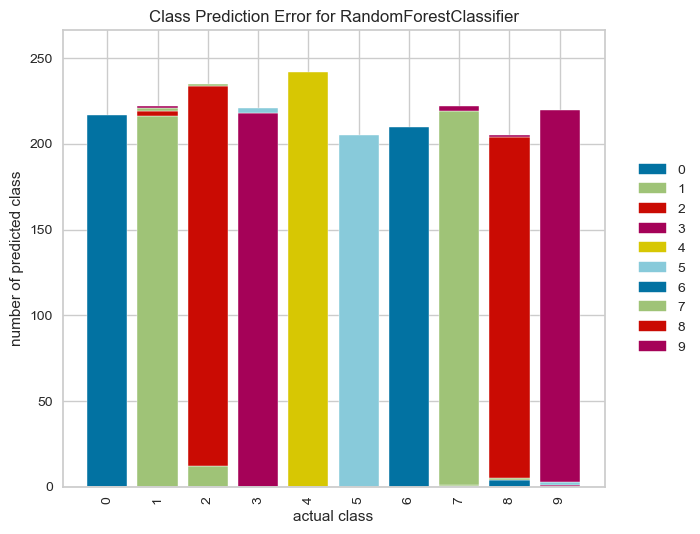

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [27]:
visualizer = ClassPredictionError(rfc)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### RF GridsearchCV

**RF HyperParameters**

**1- N_ESTIMATORS:** Modelin kaç adet karar ağacı kullanacağını belirler. "Modelimde kac tane agac modeli olsun?" RandomForest icin en onemli parametredir. (Default=100) sub sample ile datanın 2/3 ile oluşturuyor!!

**2- CRITERION = GINI :** bir düğümdeki sınıfların heterojenliğini ölçer. Bulundugu bolgedeki yanlis hesaplamanin degerini minimize etmeye calisir. Bu yuzden gini kucukse, hata da kucuk demektir. Basari arttikca gini 0' a yaklasir. Tum class' lari mukemmel ayirdigi noktada gini=0 olur.

**ENTROPY :** bir düğümdeki sınıfların belirsizliğini ölçer, bilgi miktarını (information gain) ifade eder. Bir düğümdeki sınıfların homojen olması durumunda entropy değeri düşük olacaktır. Yani, bir düğümde sınıfların tamamı aynıysa, o zaman entropy değeri sıfıra yakın olacaktır. Kısaca Kaos demektir. Kaosun en az olmasini isteriz.!!!

Basari orani arttikca gini ve entropy 0' a yaklasir. !!!

**3- MAX_DEPTH:** Karar ağacının maksimum derinliğini belirleyen bir hiperparametredir. Agac ne kadar derinlige insin? (Oklarin adim sayisi)(Bias ekleme islemi)

**4- MIN_SAMPLES_SPLIT :** Bir düğümün yaprağın bölünmeden önce kaç örneğe sahip olması gerektiğini belirleyen bir hiperparametredir. Bir yapragin bolunebilmesi icin o yaprakta bulunmasi gereken sample sayisi. Default degeri=2. Yani, sample sayisi en az 2 ise bolunmeye devam et. Hata kaldiysa bolmeye devam eder, kalmadiysa durur. Ayarlamasi cok fazla dikkat gerektirir. Bu yuzden ilk asamadad egistirilmesi tercih edilmez.

**5- MAX_FEATURES:** Tek bir ağaçta kullanılacak maksimum feature sayısıdır. Tum feature'lari gezerek "En iyi soruyu hangi feature'a sorabilirim?" diyor fakat bu parametrenin Decision Tree modelden farki: Feature sayisinin karekokunu alir o kadar feature icinden en iyisini secer ve yoluna devam eder. Mesela 8 feature varsa onun karekokunu alir ve int olarak alt sayiya yuvarlar; yani degeri 2 olarak kabul eder ve bunlar arasindan en iyifeature' i secer. Boylece overfitting' ' Decision Tree Model' e gore onlemis olur.(Default='auto')!!

**6- MAX_LEAF_NODE:** Bir karar ağacının oluşturabileceği maksimum yaprak (leaf) düğüm sayısını belirler.

**7- BOOTSTRAP:** Modelimi Random Tree Model yapan bu parametredir. Datadaki sample sayisini her bir agac icin rastgele 2/3 oraninda ayirir ve onlar icinden max_feature'a gore subsample'lar secerek agaclar olusturur. Böylece, oluşturulan her bir karar ağacı, farklı bir alt küme üzerinde eğitilir.Her bir ağacın birbirinden bağımsız olmasını ve daha farklı özelliklerin öğrenilmesini sağlar. Rastgele secim yaptigi icin train setinde daha iyi genellestirme yapar ve skorlar iyilesir.(Default=True)

**8- CLASS_WEIGHT :** Istenirse Logistic Regression' daki gibi bir balance islemi uygulanabilir. (Default=None)

**9- MAX_SAMPLES:** 'none' dedigimizde butun datadaki verileri alir ama 0.8dedigimizde datanin %80' ini alir ve sonra Random Forest bu %80' in 2/3' unualir. Yani her agaca sample verirken datanin %80' ini verir. (Default=None)

In [28]:
param_grid = {
             'criterion': ["entropy","gini"],
             'max_depth':[7,8],
             'max_features':['auto', 0.8],
             'max_leaf_nodes': [180,200],
             'n_estimators':[50,100],
             }

In [29]:
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [7, 8],
                         'max_features': ['auto', 0.8],
                         'max_leaf_nodes': [180, 200],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [30]:
rf_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 0.8,
 'max_leaf_nodes': 200,
 'n_estimators': 100}

In [31]:
y_pred_test = rf_grid_model.predict(X_test)
y_pred_train = rf_grid_model.predict(X_train)

In [32]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.9758981355161437, 0.9930626634823155, 0.975918111990209, 0.9931124257797294)

In [33]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))
print("-*"*30)
print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[217   0   0   0   0   0   0   0   4   0]
 [  0 214  14   0   0   0   0   1   0   0]
 [  0   1 221   1   0   0   0   2   0   0]
 [  0   1   0 217   0   1   0   0   0   0]
 [  0   0   0   0 242   0   0   0   0   0]
 [  0   0   0   6   0 198   0   0   1   5]
 [  0   0   0   0   0   0 210   0   0   0]
 [  0   5   2   1   0   0   0 213   1   0]
 [  1   0   0   0   0   0   0   0 198   0]
 [  0   1   0   2   0   0   0   2   1 216]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[922   0   0   0   0   0   0   0   0   0]
 [  0 885  15  14   0   0   0   0   0   0]
 [  0   1 915   2   0   0   0   1   0   0]
 [  0   3   2 827   0   1   0   2   0   1]
 [  0   1   0   0 900   0   0   0   0   1]
 [  0   0   0   1   0 843   0   0   0   1]
 [  0   0   0   0   1   0 845   0   0   0]
 [  0   4   1   4   0   0   0 911   0   0]
 [  0   0   0   0   0   0   0   1 855   0]
 [  0   1   0   2   1   0   0   0   0 829]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

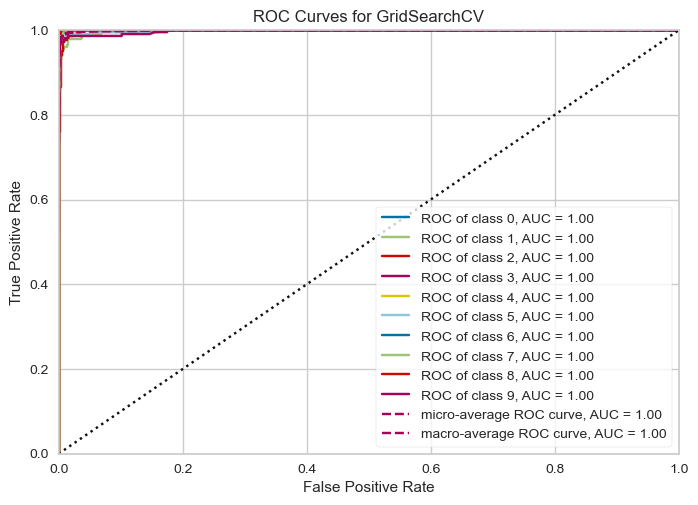

<Axes: title={'center': 'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [34]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(rf_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

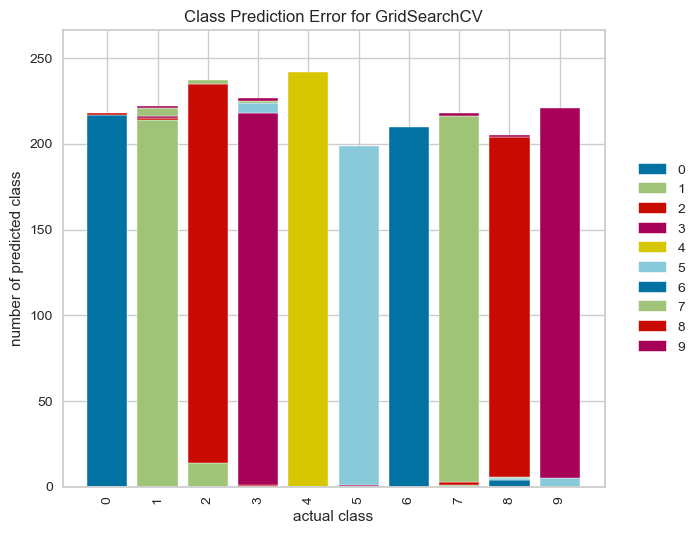

<Axes: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [35]:
visualizer = ClassPredictionError(rf_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

# Compare The Models

## Accuracy Comparison

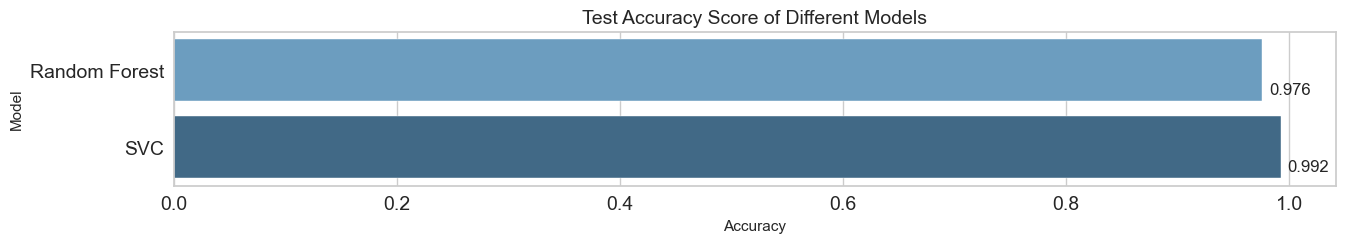

In [36]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest"],
                        "Accuracy": [SVM_accuracy_test, rfc_accuracy_test]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(15,2))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.9),
                xytext=(5, 10), textcoords='offset points')

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test Accuracy Score of Different Models", size=14);

## F1 Score Comparison

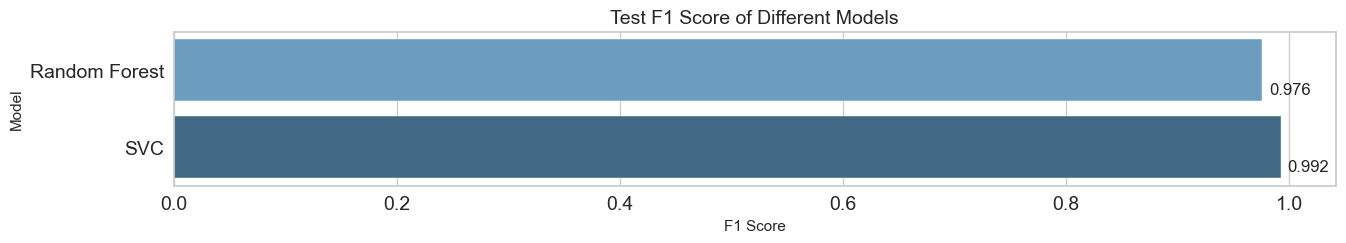

In [37]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest"],
                        "F1 Score": [svm_f1_test, rfc_f1_test]})

compare = compare.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(15,2))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + .9),
                xytext=(5, 10), textcoords='offset points')

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test F1 Score of Different Models", size=14);

# Conclusion

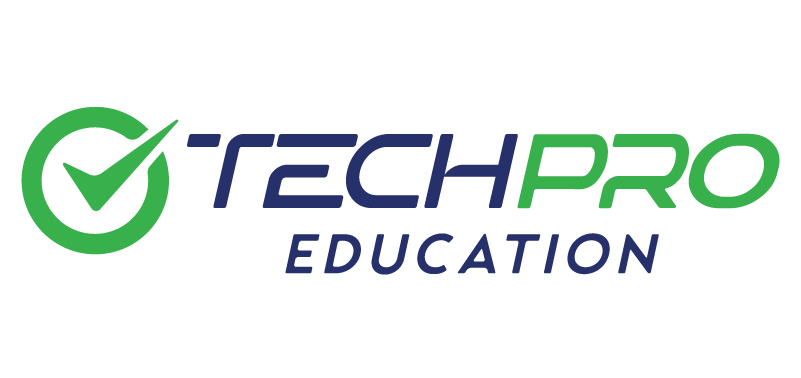